In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Pivoting
#### Average Fare by Class and Sex

In [2]:
sex_average_fare = pd.pivot_table(titanic, index='class', columns='sex', values='fare', aggfunc=np.mean)
sex_average_fare

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


#### Survivors by Class

In [3]:
survivors_by_class = pd.pivot_table(titanic, index='class', columns='sex',values='survived', aggfunc=np.sum)
survivors_by_class

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


#### Fare by Survivors and Non Survivors

In [4]:
fare_by_survivors = pd.pivot_table(titanic, index='survived', values='fare', aggfunc=np.mean)
fare_by_survivors

,fare
survived,
0,22.117887
1,48.395408


### Melting

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
melt = pd.melt(titanic, var_name='Category', value_vars=['adult_male', 'alone'], value_name='True/False')
melt

,Category,True/False
0,adult_male,True
1,adult_male,False
2,adult_male,False
3,adult_male,False
4,adult_male,True
...,...,...
1777,alone,True
1778,alone,True
1779,alone,False
1780,alone,True


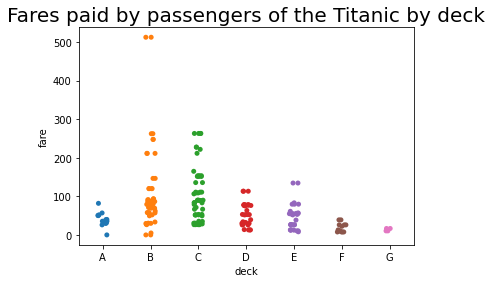

<AxesSubplot:xlabel='deck', ylabel='fare'>

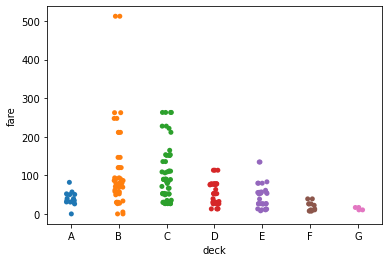

In [7]:
# title
plt.title('Fares paid by passengers of the Titanic by deck', fontsize=20)

# plot
sns.stripplot(x="deck", y="fare", data=titanic);

# saves the image
plt.savefig("titanicstripplot.png")

# shows the image
plt.show()

sns.stripplot(x="deck", y="fare", jitter= True, data=titanic)

c:\Users\Angel\Documents\GitHub\MAT-243-J4480-applied-statistics\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Angel\Documents\GitHub\MAT-243-J4480-applied-statistics\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Angel\Documents\GitHub\MAT-243-J4480-applied-statistics\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Angel\Documents\GitHub\MAT-243-J4480-applied-statistics\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease t

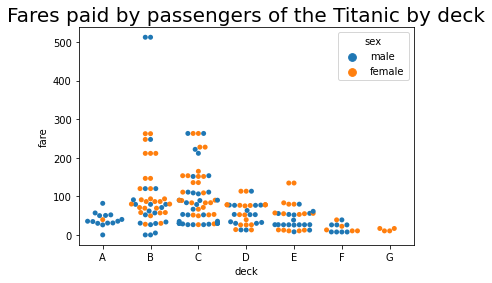

In [8]:
# title
plt.title('Fares paid by passengers of the Titanic by deck', fontsize=20)

# plot
sns.swarmplot(x="deck", y="fare", hue = "sex", data=titanic);

# saves the image
plt.savefig("titanicswarmplot.png")

# shows the image
plt.show()


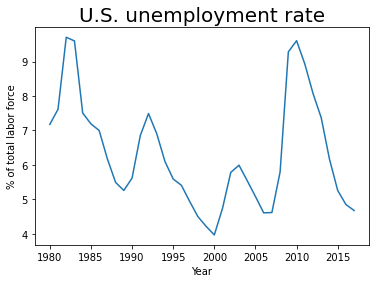

In [9]:
# loads the unemployment dataset
unemployment = pd.read_csv('http://data-analytics.zybooks.com/unemployment.csv')

# title
plt.title('U.S. unemployment rate', fontsize = 20)

# x and y axis labels
plt.xlabel('Year')
plt.ylabel('% of total labor force')

# plot
plt.plot(unemployment["Year"], unemployment["Value"])

# saves the image
plt.savefig("linechart.png")

# shows the image
plt.show()

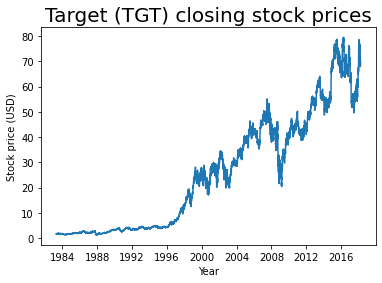

In [10]:
# creates a data frame containing TGT stock data
import quandl
tgt = quandl.get('WIKI/TGT')

# title
plt.title('Target (TGT) closing stock prices', fontsize=20)

# x and y axis labels
plt.xlabel('Year');
plt.ylabel('Stock price (USD)');

# plot
plt.plot(tgt.index, tgt['Adj. Close'])

# saves the image
plt.savefig("tgtstocklinechart.png")

In [15]:
rando = pd.DataFrame([-1,-5,-3,6,7])

print(rando.median())

0   -1.0
dtype: float64
